Exercitul **1** - Creați un dataframe (tabel de date) pornind de la pagina de submisii a unui user de pe codeforces sau infoarena. Includeți și link-urile problemelor în tabel.

In [ ]:
! pip install requests

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

html = requests.get('https://codeforces.com/submissions/anamaria_panait')
soup = bs(html.content, features='html.parser')

problems_url = []
lines = soup.select('table.status-frame-datatable tr')
for line in lines[1:]:
    cells = [cell for cell in line.select('td')]

    # extract the links for the problems
    problem_url = cells[3].select_one("a")["href"]

    problems_url.append(problem_url)

df = pd.read_html(html.content)[0]
df['Problem link'] = problems_url
df



,#,When,Who,Problem,Lang,Verdict,Time,Memory,Problem link
0,64897286,Nov/14/2019 20:12,anamaria_panait,A - Two Rival Students,C++17 (GCC 7-32),Accepted,31 ms,0 KB,/contest/1257/problem/A
1,64895480,Nov/14/2019 19:24,anamaria_panait,B - Minimize the Permutation,C++17 (GCC 7-32),Accepted,30 ms,0 KB,/contest/1256/problem/B


Exercitul *2* - Scrieți o funcție care primește ca parametru un link de la o problemă de pe codeforces și întoarce lista etichetelor (tags). Etichetele unei probleme se găsesc în partea dreaptă a paginii problemei.

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_problem_tags(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        tags_container = soup.select('span.tag-box')
        tags = [tag.get_text(strip=True) for tag in tags_container] if tags_container else []

        return tags
    except Exception as e:
        print(f"Error: {e}")

url = "https://codeforces.com/contest/1257/problem/A"
tags = get_problem_tags(url)
print(tags)


['greedy', 'math', '*800']


Exercitiul 3 - Adăugați o coloană în tabel cu etichetele pentru fiecare problemă.

In [ ]:
df['Tags'] = df['Problem link'].apply(lambda url: ', '.join(get_problem_tags(f"https://codeforces.com{url}")))
df

,#,When,Who,Problem,Lang,Verdict,Time,Memory,Problem link,Tags
0,64897286,Nov/14/2019 20:12,anamaria_panait,A - Two Rival Students,C++17 (GCC 7-32),Accepted,31 ms,0 KB,/contest/1257/problem/A,"greedy, math, *800"
1,64895480,Nov/14/2019 19:24,anamaria_panait,B - Minimize the Permutation,C++17 (GCC 7-32),Accepted,30 ms,0 KB,/contest/1256/problem/B,"greedy, *1400"


Exercitiul 4 - Creați un wordcloud bazat cu cele mai comune etichete. Asta ne va ajuta să ne dăm seama ce fel de probleme a încercat un utilizator cel mai mult (sau cel mai puțin)

['greedy, math, *800', 'greedy, *1400']
greedy, math, *800 greedy, *1400


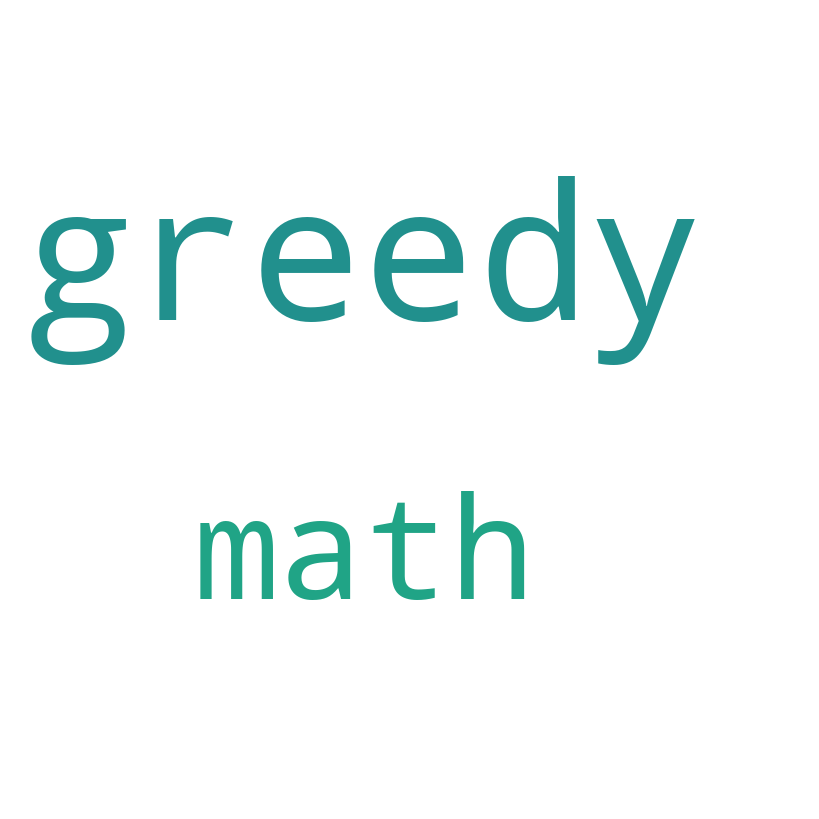

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_tags = []
for tags_list in df['Tags']:
    all_tags.append(tags_list)

print(all_tags)
text = ' '.join(all_tags)
print(text)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Exercitiul 5 - Afișează un grafic bazat pe coloana "Verdict". Ar trebui să arate câte probleme au fost acceptate, câte au picat pe primul test etc.

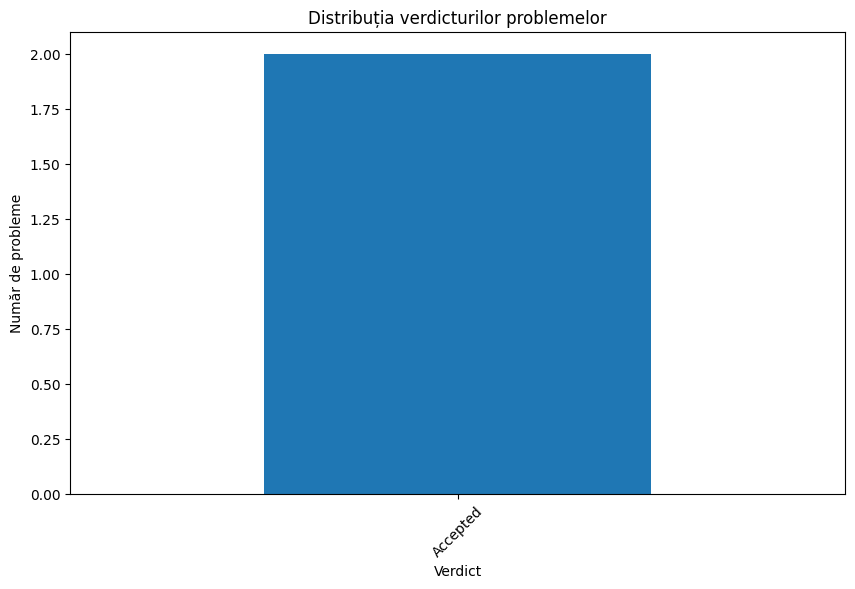

In [ ]:
import matplotlib.pyplot as plt

verdict_counts = df['Verdict'].value_counts()

plt.figure(figsize=(10, 6))
verdict_counts.plot(kind='bar')

plt.title('Distribuția verdicturilor problemelor')
plt.xlabel('Verdict')
plt.ylabel('Număr de probleme')
plt.xticks(rotation=45)

plt.show()

Exercitul 6 - Salvează dataframe-ul ca un csv local.

In [ ]:
df.to_csv('data_frame.csv', index=False)

Exercitiul 7 - Scrie o clasă care primește username-ul unui utilizator la inițializare, creează un dataframe ca variabila statică în clasă cu submisiile (ca la exercițiul 1) și are o serie de funcții care pot fi apelate pentru a rezolva exercițiile 3-6

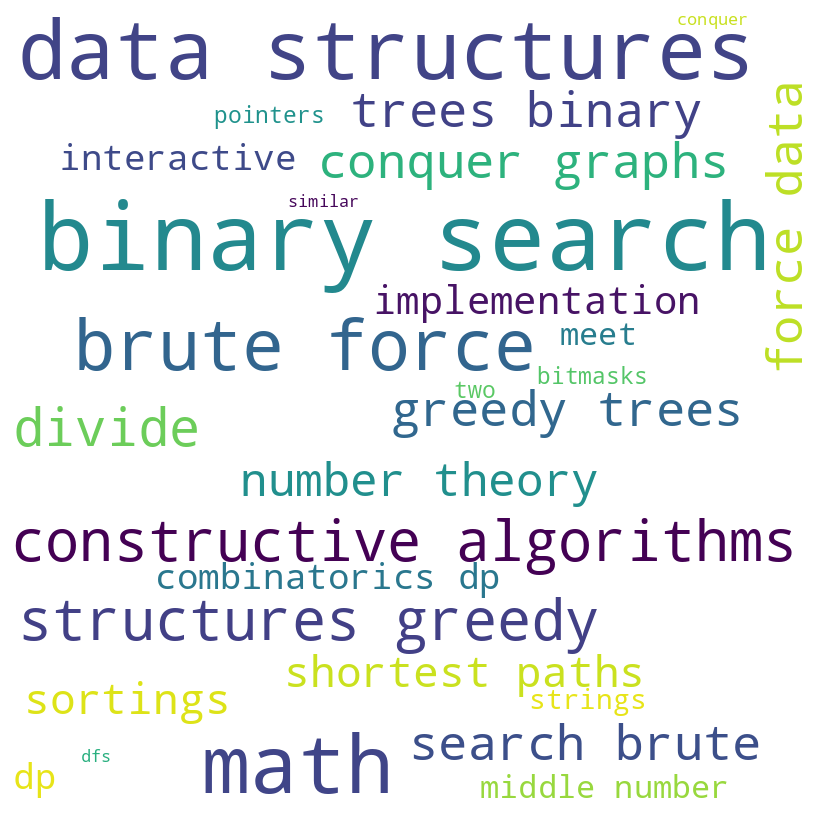

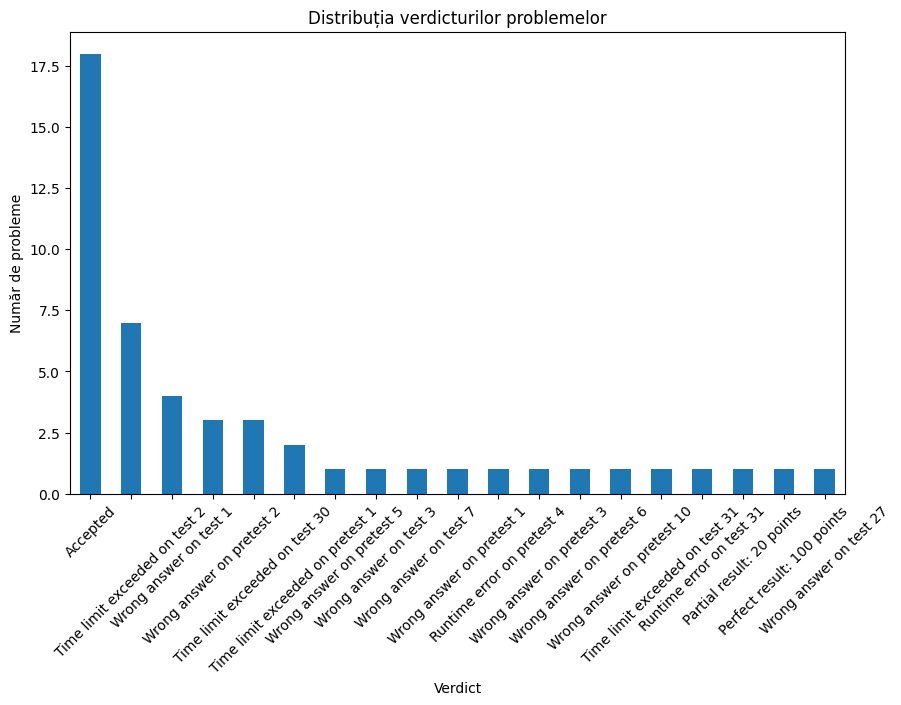

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup as bs

class CodeforcesUser:
    submissions_df = pd.DataFrame()

    def __init__(self, username):
        html = requests.get(f'https://codeforces.com/submissions/{username}')
        soup = bs(html.content, features='html.parser')

        problems_url = []
        lines = soup.select('table.status-frame-datatable tr')
        for line in lines[1:]:
            cells = [cell for cell in line.select('td')]
            problem_url = cells[3].select_one("a")["href"]
            problems_url.append(problem_url)

        CodeforcesUser.submissions_df = pd.read_html(html.content)[0]
        CodeforcesUser.submissions_df['Problem link'] = problems_url

    # cerinta ex 3
    def add_tags_column(self):
      CodeforcesUser.submissions_df['Tags'] = CodeforcesUser.submissions_df['Problem link'].apply(lambda url: ', '.join(get_problem_tags(f"https://codeforces.com{url}")))

    # cerinta ex 4
    def get_tags_wordcloud(self):
        all_tags = []
        for tags_list in CodeforcesUser.submissions_df['Tags']:
            all_tags.append(tags_list)

        text = ' '.join(all_tags)

        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        min_font_size = 10).generate(text)

        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()

    # cerinta ex 5
    def get_verdicts_count(self):
        verdict_counts = CodeforcesUser.submissions_df['Verdict'].value_counts()

        plt.figure(figsize=(10, 6))
        verdict_counts.plot(kind='bar')

        plt.title('Distribuția verdicturilor problemelor')
        plt.xlabel('Verdict')
        plt.ylabel('Număr de probleme')
        plt.xticks(rotation=45)

        plt.show()

    # cerinta ex 6
    def save_submissions_csv(self, filepath):
        CodeforcesUser.submissions_df.to_csv(filepath, index=False)

username = "IzhtskiyTimofey"
user = CodeforcesUser(username)
# cerinta 3
user.add_tags_column()
# cerinta 4
user.get_tags_wordcloud()
# cerinta 5
user.get_verdicts_count()
# cerinta 6
user.save_submissions_csv(f'user_{username}_submissions.csv')
